# FOURTH DEGREE REGRESSION MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

trn_d= pd.read_csv('trainRegression.csv')
trn_d.head()

,X,R
0,0.01,-0.2730
1,0.02,-0.1170
2,0.03,-0.3090
3,0.04,0.0306
4,0.05,-0.0802


In [2]:
trnx= np.array(trn_d['X']) 
trny= np.array(trn_d['R'])

In [3]:
A=np.array([[len(trnx),sum(trnx),sum(trnx**2),sum(trnx**3),sum(trnx**4)],[sum(trnx),sum(trnx**2),sum(trnx**3),sum(trnx**4),sum(trnx**5)],[sum(trnx**2),sum(trnx**3),sum(trnx**4),sum(trnx**5),sum(trnx**6)],[sum(trnx**3),sum(trnx**4),sum(trnx**5),sum(trnx**6),sum(trnx**7)],[sum(trnx**4),sum(trnx**5),sum(trnx**6),sum(trnx**7),sum(trnx**8)]])
A

array([[2.83000000e+02, 4.44950000e+02, 9.32746500e+02, 2.19978103e+03,
        5.53385258e+03],
       [4.44950000e+02, 9.32746500e+02, 2.19978103e+03, 5.53385258e+03,
        1.45013383e+04],
       [9.32746500e+02, 2.19978103e+03, 5.53385258e+03, 1.45013383e+04,
        3.90864884e+04],
       [2.19978103e+03, 5.53385258e+03, 1.45013383e+04, 3.90864884e+04,
        1.07548336e+05],
       [5.53385258e+03, 1.45013383e+04, 3.90864884e+04, 1.07548336e+05,
        3.00624107e+05]])

In [4]:
B=np.array([[sum(trny)],[sum(trnx*trny)],[sum(trny*(trnx**2))],[sum(trny*(trnx**3))],[sum(trny*(trnx**4))]])
B

array([[ 1.39087000e+00],
       [-1.26641429e+02],
       [-3.78875690e+02],
       [-9.52324104e+02],
       [-2.30897053e+03]])

In [5]:
A_inverse=np.linalg.inv(A)
A_inverse

array([[ 0.0887679 , -0.33897693,  0.37739305, -0.1600368 ,  0.02290273],
       [-0.33897693,  1.72305531, -2.1566346 ,  0.97513706, -0.14533051],
       [ 0.37739305, -2.1566346 ,  2.87849422, -1.35556527,  0.20778177],
       [-0.1600368 ,  0.97513706, -1.35556527,  0.65656453, -0.10273065],
       [ 0.02290273, -0.14533051,  0.20778177, -0.10273065,  0.01632869]])

In [6]:
i=np.dot(A_inverse,B)
i

array([[-0.40789474],
       [ 5.3320982 ],
       [-5.77179206],
       [ 1.81519401],
       [-0.15632916]])

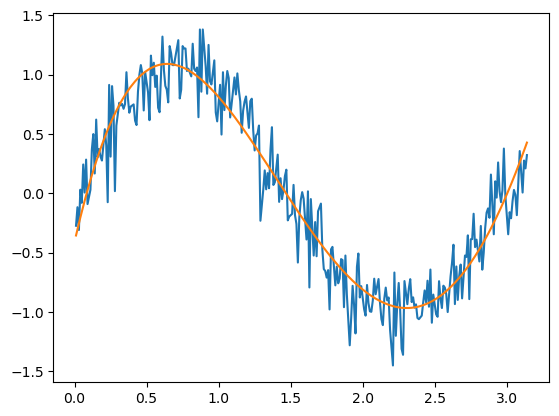

In [7]:
Predtrn=i[0]+i[1]*trnx+i[2]*(trnx**2)+i[3]*(trnx**3)+i[4]*(trnx**4)
plt.plot(trnx,trny)
plt.plot(trnx,Predtrn)

In [8]:
#MSR FOR TRAINING DATA
sum(np.square(trny-Predtrn))/len(trnx)

0.044371636525453506

In [9]:
tst_d= pd.read_csv('testRegression.csv')
tstx=tst_d['X']
tsty=tst_d['R']

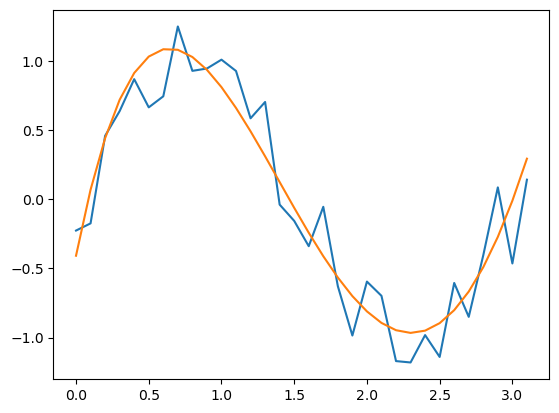

In [10]:
Predtst= i[0]+i[1]*tstx+i[2]*(tstx**2)+i[3]*(tstx**3)+i[4]*(tstx**4)
plt.plot(tstx,tsty)
plt.plot(tstx,Predtst)

In [11]:
#MSR FOR TESTING DATA 
sum(np.square((tsty)-(Predtst)))/len(tstx)

0.050025218416224586